In [11]:
# Import necessary libraries

import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

%matplotlib inline

# Useful Notebook References
1. [Stock Market Analysis + Prediction using LSTM](https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm)

# Useful Resources
1. [Indicators to assess stocks](https://www.getsmarteraboutmoney.ca/invest/investment-products/stocks/6-indicators-used-to-assess-stocks/) (Term definitions e.g. PE Rate, PEG Rate, etc.)
2. [Visualizing Free Stock Data for Algorithmic Trading with Python and Matplotlib](https://medium.com/wealthy-bytes/visualizing-free-stock-data-for-algorithmic-trading-with-python-and-matplotlib-dca1abbd286c)

# Several Questions
1. Are there any relationships between companies in the same sector?
    - Automotive (Tesla, Nikola Corp., Ford, Tata, etc.)
    - Ride-hailing or food delivery (Grab, Uber, Gojek, Didi, Lyft, etc.)
    - Technology (Facebook, Amazon, Apple, Google, etc.)
2. How does a company affect its suppliers and vice-versa?
3. Can we predict stock value using relevant information and from other companies?
4. How does significant events/incidents (New Year, COVID-19, Brexit, etc.) affect the stock prices?

# [Forces That Move Stock Prices](https://www.investopedia.com/articles/basics/04/100804.asp)

Fundamental Factors
1. An earnings base, such as earnings per share (EPS)
2. A valuation multiple, such as a P/E ratio

Technical Factors
1. Inflation
2. Economic Strength of Market and Peers
3. Substitutes
4. Incidental Transactions
5. Demographics
6. Trends
7. Liquidity

In [2]:
API_KEY = 'Q9LHK50C644JR6L9'

In [12]:
def create_json(equities: list):
    '''
    Takes a list of equities (e.g. ['AMZN', 'AAPL']) as input and 
    creates json files in 'equities_json' folder that 
    contains information about the equities.
    
    We save the data into json locally to prevent long waiting times
    during fetching from the API.
    
    You may want to call this function again to update the data or 
    changing the type of series.
    '''
    
    # Change this when looking at different series
    function = 'TIME_SERIES_DAILY_ADJUSTED'
    datatype = 'json'
    
    for symbol in equities:
        url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={API_KEY}&datatype={datatype}'
        resp = requests.get(url)
        
        path = f'equities_json/{symbol}.json'
        with open(path, 'w') as output_file:
            json.dump(resp.json(), output_file)

In [13]:
def plot_equities(equities: list):
    '''
    Takes a list of equities (e.g. ['AMZN', 'AAPL']) as input and 
    creates a single time series plot where it contains all the equities.
    '''
    
    plt.figure(figsize=(18, 8))
    plt.xlabel = 'Date'
    plt.ylabel = 'Close (USD)'
    
    # Change this when looking at different series
    convert_dict = {'Open': 'float64', 'High': 'float64', 'Low': 'float64', 'Close': 'float64', 'Adjusted Close': 'float64', 'Volume': 'int64', 'Dividend Amount': 'float64', 'Split Coefficient': 'float64'}
    
    # Set starting date to observe
    start_date = np.datetime64('2020-01-01')
    
    for symbol in equities:
        path = f'equities_json/{symbol}.json'
        
        try:
            json_data = json.load(open(path))
        except FileNotFoundError:
            create_json([symbol])
            json_data = json.load(open(path))
        
        # Data Cleaning
        data = pd.DataFrame(json_data['Time Series (Daily)']).transpose()
        
        data.columns = ['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'Dividend Amount', 'Split Coefficient']
        data.index = pd.to_datetime(data.index)
        data.index.name = 'Date'
        
        data = data.sort_index().astype(convert_dict)
        data = pd.DataFrame(data[data.index >= start_date])
        
        # Change the key when observing other columns
        data['Close'].plot(label=symbol)
        
    plt.legend()

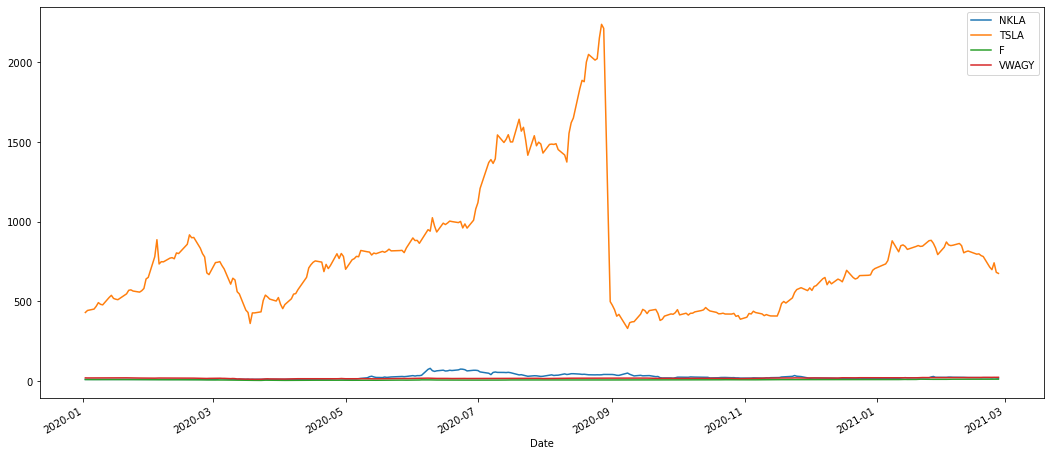

In [9]:
plot_equities(['NKLA', 'TSLA', 'F', 'VWAGY'])

In [6]:
FUNCTION = 'OVERVIEW'
SYMBOL = 'TSLA'
URL = f'https://www.alphavantage.co/query?function={FUNCTION}&symbol={SYMBOL}&apikey={API_KEY}'

resp = requests.get(URL)
resp.json()

{'Symbol': 'TSLA',
 'AssetType': 'Common Stock',
 'Name': 'Tesla, Inc',
 'Description': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limite